In [ ]:
!pip install tensorflow 
!pip install tensorflow keras 
!pip install tensorflow sklearn 
!pip install tensorflow matplotlib 
!pip install tensorflow pandas 
!pip install tensorflow pil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


In [ ]:
def download_dataset_from_kaggle() :
  '''
  This function downloads the German traffic sign
  dataset from kaggle and stores it in temporary
  session memory of google colab and unzips it.
  '''
  from google.colab import files
  #Upload the kaggle api token
  print('Please upload the kaggle api token :')
  files.upload() #this will prompt you to update the json
  !pip install -q kaggle
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !ls ~/.kaggle
  !chmod 600 /root/.kaggle/kaggle.json  # set permission

  #Downloading and unzipping the dataset
  !kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
  !unzip -q /content/gtsrb-german-traffic-sign.zip -d Data
  

#Calling the function
download_dataset_from_kaggle()

Please upload the kaggle api token :


Saving kaggle.json to kaggle.json
kaggle.json
 98% 602M/612M [00:06<00:00, 126MB/s]
100% 612M/612M [00:06<00:00, 94.4MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 
for i in range(classes): 
  path = os. path.join('Data/train', str(i)) 
  images = os.listdir(path) 
  for a in images:
    try:
      image = Image.open(path + '/'+ a)
      image = image.resize((30,30)) 
      image = np.array(image) 
      data.append(image) 
      labels.append(i) 
    except: 
      print("Error loading image") 
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

In [ ]:
X_t1.shape[0:]

(31367, 30, 30, 3)

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

In [ ]:
import time

eps = 10

start_time = time.time()
anc = model.fit(X_t1, y_t1, batch_size=64, epochs=eps, validation_data=(X_t2, y_t2))
end_time = time.time()

elapsed_time = end_time - start_time

print('Execution time: ', elapsed_time, ' seconds')

Epoch 1/10
491/491 [==============================] - 126s 255ms/step - loss: 2.8298 - accuracy: 0.3400 - val_loss: 0.9845 - val_accuracy: 0.7748
Epoch 2/10
491/491 [==============================] - 125s 255ms/step - loss: 0.9626 - accuracy: 0.7297 - val_loss: 0.2866 - val_accuracy: 0.9438
Epoch 3/10
491/491 [==============================] - 127s 259ms/step - loss: 0.4849 - accuracy: 0.8647 - val_loss: 0.1317 - val_accuracy: 0.9667
Epoch 4/10
491/491 [==============================] - 125s 254ms/step - loss: 0.3084 - accuracy: 0.9158 - val_loss: 0.0809 - val_accuracy: 0.9836
Epoch 5/10
491/491 [==============================] - 125s 255ms/step - loss: 0.2316 - accuracy: 0.9362 - val_loss: 0.0491 - val_accuracy: 0.9887
Epoch 6/10
491/491 [==============================] - 126s 256ms/step - loss: 0.1956 - accuracy: 0.9464 - val_loss: 0.0537 - val_accuracy: 0.9893
Epoch 7/10
491/491 [==============================] - 126s 258ms/step - loss: 0.1660 - accuracy: 0.9553 - val_loss: 0.0308 -

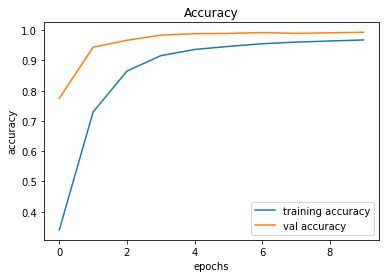

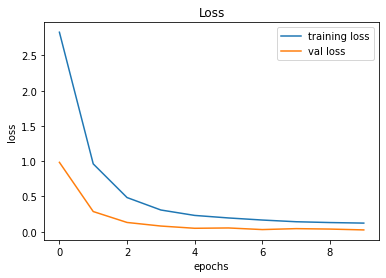

In [ ]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Data/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
imgs = "Data/" + imgs
data=[]
for img in imgs:
  image = Image.open(img)
  image = image.resize((30,30))
  data.append(np.array(image))
X_test=np.array(data)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
#pred = model.predict_classes(X_test)

In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x))
model.save('traffic_classifier.h5')

0.9690419635787807
